# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [58]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows


Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: These computations give us some idea as to how the purchasing of these products is related. For the PCA, the first dimension will be a weighted combination of products that maximizes the variance in that direction. Meaning if you know the amount of one product that is purchased you can predict as best as possible the number of other products purchased. Likely a few highly correlated products will have large coefficients while uncorrelated ones will have small ones. For example, this might be Fresh and Grocery which may be consumed proportionally for most recipes across markets.  

The type of vectors that show up for ICA represent purchasing sources. For this data set sources means types of customers. Each row represents annual spending from a specific local market. Thus the vectors from ICA should reveal differenty types of aggregate customers that visit each market. For example they may be grouped by region as grocery spending is largely cultural and tied to geography.


###PCA

In [59]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print "PCA components:"
print pca.components_
print "Variance ratio:"
print pca.explained_variance_ratio_



PCA components:
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
Variance ratio:
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: They variance drops of quickly after two dimesions by almost an order of magnitude. If I were to use PCA on this dataset I would analyze the first two components. This is because the variance of the data in the other 4 directions is very small. Meaning that the products are purchased in proportion to the first two principle components. The other components don't contain much information. 

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first vector weights Fresh almost exclusively with 0.98. The second vector weights Milk Grocery and Detergent_Paper with coefficients 0.52, 0.76, and 0.36. This means that this data can be analyzed by only considering these two prinicipal components. More specifically we can reduce the dimension of our problem from 6 to 2. Changing coordinates such that the first two dimensions lie along the principle components. The other 4 dimensions can be truncated. Other ML algorithms can be run on this new data set and still extract most of the information while enjoying the reduced computation and avoiding the "curse of dimensionality".  

###ICA

In [60]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!

from sklearn import preprocessing
from sklearn.decomposition import FastICA

ica = FastICA(random_state=128,n_components = 6)

data_centered = data - np.mean(data, axis =0)

#Compute ICA manually whitened
ica.fit(data_centered)
#Scale to make it easier to see coefficients
scaled_unmixing = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, ica.components_)
print np.around(scaled_unmixing, 5)


print np.around(data_centered.head() ,1) # print the first 5 rows

[[-0.01147 -0.7372   0.43455  0.02731 -0.24696  0.4537 ]
 [ 0.83593 -0.18015 -0.12872 -0.14267  0.4279  -0.22078]
 [-0.03114  0.27929 -0.93093 -0.0622   0.08711  0.20722]
 [-0.00963  0.07296  0.38627 -0.04655 -0.89986 -0.18294]
 [-0.02132 -0.0121  -0.03324 -0.02876  0.02823  0.99833]
 [-0.06812 -0.01103  0.06098  0.87744 -0.04387 -0.46872]]
     Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    668.7  3859.7   -390.3 -2857.9            -207.5        -186.9
1  -4943.3  4013.7   1616.7 -1309.9             411.5         251.1
2  -5647.3  3011.7   -267.3  -666.9             634.5        6319.1
3   1264.7 -4600.3  -3730.3  3332.1           -2374.5         263.1
4  10614.7  -386.3   -753.3   843.1           -1104.5        3660.1


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 
Row1 - There is a large negative compoenent on Milk and two medium sized components on Grocery and Deli. 
Row2 - There is a large positive Fresh coefficient and a medium Detergent/Paper coefficient. This is a tough combination to associate a source to as the combination seems strange. 
Row3 - There is a very large Grocery coefficient. 
Row4 - There is a very large Detergent/Paper coefficient. This source could be associated with customers motivated to shop for cleaning reasons rather than food. 
Row5 - There is a very large Deli coefficient. This source may be the people who come to eat prepared meals at the store, e.g. sandwiches. This would be largely uncorrelated with shopping for other categories. 
Row6 - There is a very large Frozen coefficient. This could be young single shoppers who eat mostly frozen food, i.e. they don't cook. 

These components could be used to help layout stores. Perhaps these sources are all a result of store layout. And stores that have certain layouts have certain items bought together. An example may be row 2 with Fresh and Detergent/Paper, which seem unrelated as products. However they may be next to each other in a particular store. This data can be used to optimize store layout by trying to arrange products to get customers to buy more from each section every time they shop. This would correspond to less variance in the unmixing matrix. 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: K Means is very simple and scales well to large data sets. Given a number of clusters it groups the data to minimize each cluster's inertia. It doesn't do will with strangely shaped clusters (e.g. crescent). It is also sensitive to increases in dimensionality (curse of dimensionality). Gaussian mixture models extends K-Means to include not only the center of mass, but also the variance of the cluster. This allows GMM to deal with clusters that have differing variances in different directions, i.e. if the cluster is long and narrow then var1>>var2. It can also give confidence information for data points that lie on cluster borders.  

For this problem I will use GMM as I feel that a softer clustering that considers the variance is most appropriate for this data set. I want to understand how focused the customers purchasing is (variance) as well as the location of the cluster (mean). 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [61]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [62]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

pca = PCA(n_components=2)

reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [63]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
g=GMM(n_components = 2)

clusters = g.fit(reduced_data)
print clusters
#print g.bic(reduced_data)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


In [64]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


In [65]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = g.means_
print centroids

[[  3308.39301792  -3017.01739698]
 [-10810.23008886   9858.15532401]]


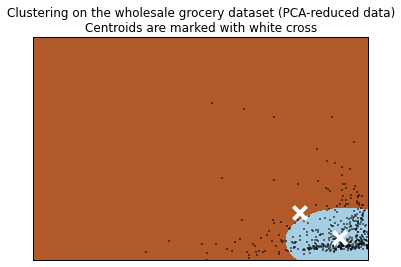

In [66]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=4,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [67]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

pca = PCA(n_components=2)

reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [68]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
g=GMM(n_components = 3)

clusters = g.fit(reduced_data)
print clusters

print g.bic(reduced_data)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
18487.1070687


In [69]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


In [70]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = g.means_
print centroids

[[  6986.10611001   4252.253209  ]
 [-17878.44951149  10108.28824429]
 [   276.11243352  -6508.22600668]]


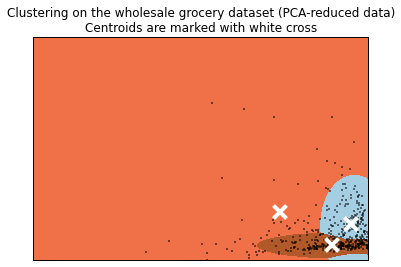

In [71]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=4,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: Two of the cluster central  objects are mean spenders for gaussians fit to data with large variances in the direction of the two principal components. One group spends most of their money on fresh products. The other spends significantly on Grocery, Milk and Detergent/Paper. The last central object is the mean of the gaussian distribution that is centered on the rest of the data points. These data points are the "left overs" that don't really fit in with the first two.  

If the number of clusters is chosen to be two. Then the group narrow horizontal group is still clustered, but more softly (i.e. the covariance matrix has singular values that are closer to equal) and the second cluster is the outliers. This choice misses the subtlety of a narrow horizontal cluster and a wider vertical cluster that I think are two different customer segments. 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I think PCA plus clustering gave the best insight into the data. The analysis shows that the shopping trends can be described by 2 principal components and the clustering shows that there isn't much overlap between the two. If you're there for fresh foods you likely will not purchase much Grocery, Milk and Detergent/Paper. This is evident by the two narrow groups near the principal component axes. 

**9)** How would you use that technique to help the company design new experiments?

Answer: A useful experiment would be one that tries to get the shoppers who by mainly fresh foods to also purchase more products in the other groups. This could be done by doing A/B testing with different store layouts. For example, assuming the fresh foods are far from the Deli, a test could be done where some deli products are put near the fresh foods section to see if that increases sales of Deli for that group. If so the Deli coefficient of the first principal component would increase. 

**10)** How would you use that data to help you predict future customer needs?

Answer: Now that we have classified some of our customers (clusters) we could train a supervised learner (e.g. decision tree classifier) and use it to predict what type of customers are shopping at any given time. Based on these predictions the store could ensure that it has enough inventory to support the type of customers who are frequenting the store. 